# Confidence-aware belief propagation for multimodal data
This notebook runs a demonstration of the belief propagtion (BP) framework initially created for post-disaster damage assessment by Luke Cullen at the University of Cambridge

In [2]:
# Install uncommon package and imprt others
try: import rioxarray
except: 
    %pip install rioxarray

import interactions as it
defaults = it.get_defaults()

Box(children=(Label(value='Please select default inputs: '), Dropdown(layout=Layout(width='max-content'), opti…

In [3]:
inputs = it.input_parameters(defaults)

/home/jovyan/damage-assessment


HTML(value='<b>Label parameters</b>')

Box(children=(Label(value='Ground truth: Shapefile - '), Text(value='./data/2018IEEE_Contest/Phase2/TrainingGT…

Box(children=(Label(value='Label column - '), Text(value='class', layout=Layout(width='max-content'), placehol…

Box(children=(Label(value='Label confidence ($P_{other label}$, $P_{class}$)'), FloatRangeSlider(value=(0.0, 1…

HTML(value='<b>Data Parameters</b>')

Box(children=(Label(value='Enter Data Types:'), Combobox(value='Hyperspectral imagery', layout=Layout(width='m…

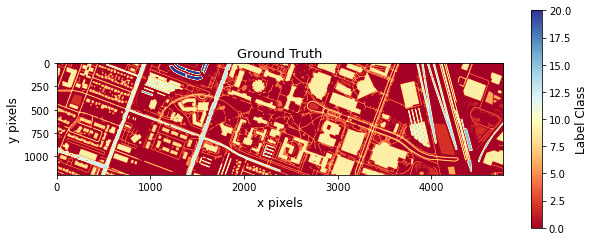

HTML(value='<h3>Model Parameters</h3>')

HTML(value='<b>Node Properties - Sampling occurs if max nodes < input nodes.</b>')

Box(children=(Label(value='Max nodes - '), IntText(value=10000, layout=Layout(width='max-content'), step=1000)…

HTML(value='<b>Edge Properties - Number of neighbours each node is connected to according to input types.</b>'…

Box(children=(IntText(value=2, description='Hyperspectral - ', layout=Layout(width='max-content')), IntText(va…

Box(children=(Label(value='Geographical Edges - '), Checkbox(value=False, indent=False, layout=Layout(width='m…

HTML(value='<b>Class Properties</b>')

HTML(value='Label Classes - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]')

Box(children=(Label(value='Classes for Model - '), Dropdown(index=19, options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11,…

In [6]:
parameters = it.model_parameters(inputs)

In [7]:
imports = it.import_data(parameters)

------Checking Coordinate Systems-------
------Finished Checking Coordinate Systems-------
------Importing Data Files---------
Imported./data/2018IEEE_Contest/Phase2/FullHSIDataset/20170218_UH_CASI_S4_NAD83.pix
Imported./data/2018IEEE_Contest/Phase2/Lidar GeoTiff Rasters/Intensity_C3/UH17_GI3F051.tif


In [8]:
rmvClass = []
imports.update({'rmvClass':rmvClass})
classified = it.classify_data(imports)

------Data Sampling---------
------Data Classification---------
Clustered classes:[0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1] , original classes:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
------Finished Data Classification---------


In [9]:
equivUse, limit = True, 1e-3
classified.update({'equivUse':equivUse, 'limit':limit})
output = it.run_bp(classified)

Nodes: 6838, Edges: 27352
It	Loss	Label change

0	6.35874e-01		2529

1	2.51126e-01		726

2	1.45425e-01		147

3	6.09880e-02		22

4	3.21082e-02		13

5	1.44028e-02		4

6	6.96138e-03		2

7	3.24814e-03		0

8	1.53561e-03		0

9	7.15266e-04		0

Time elapsed: 2.7874755859375 seconds


              precision    recall  f1-score   support

         cl0       0.56      0.54      0.55       920
         cl1       0.55      0.57      0.56       920

    accuracy                           0.55      1840
   macro avg       0.55      0.55      0.55      1840
weighted avg       0.55      0.55      0.55      1840



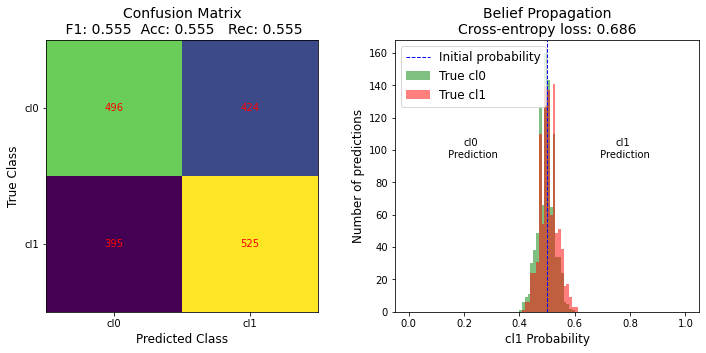

In [10]:
equivTest = True
output.update({'equivTest':equivTest})
plots = it.evaluate_output(output)

In [ ]:
it.save_plot(plots, location=False)

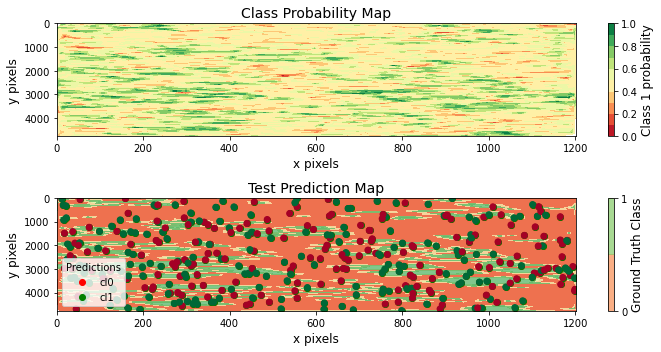

In [11]:
mapping = it.map_result(plots)